### Columns

#### People  
**ID**: Customer's unique identifier.   
**Year_Birth**: Customer's birth year.  
**Education**: Customer's education level.  
**Marital_Status**: Customer's marital status.  
**Income**: Customer's yearly household income.  
**Kidhome**: Number of children in customer's household.  
**Teenhome**: Number of teenagers in customer's household.  
**Dt_Customer**: Date of customer's enrollment with the company.  
**Recency**: Number of days since customer's last purchase.  
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.  
#### Products   
**MntWines**: Amount spent on wine in last 2 years.  
**MntFruits**: Amount spent on fruits in last 2 years.  
**MntMeatProducts**: Amount spent on meat in last 2 years.  
**MntFishProducts**: Amount spent on fish in last 2 years.  
**MntSweetProducts**: Amount spent on sweets in last 2 years.  
**MntGoldProds**: Amount spent on gold in last 2 years.  

#### Promotion  
**NumDealsPurchases**: Number of purchases made with a discount.  
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.  
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.  
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.  
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.  
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.  
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise.  

#### Place  
**NumWebPurchases**: Number of purchases made through the company’s website.  
**NumCatalogPurchases**: Number of purchases made using a catalogue.  
**NumStorePurchases**: Number of purchases made directly in stores.  
**NumWebVisitsMonth**: Number of visits to company’s website in the last month.  

Load the [dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data). 

In [1]:
import pandas as pd
import numpy as np

# cell 2: load TSV (tab-separated) and show head
csv_path = 'marketing_campaign.csv'

# Read as tab-separated (\t).
df = pd.read_csv(csv_path, sep='\t', encoding='utf-8', low_memory=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
# cell 4: fill missing Income by group mean (Education + Marital Status), round stored values, and show the rows that were missing
from IPython.display import display
# find income column
income_cols = [c for c in df.columns if 'income' in c.lower()]
if not income_cols:
    raise KeyError("No column with name containing 'income' found in df.columns")
income_col = income_cols[0]
# remember which rows were missing originally
was_missing = df[income_col].isna()
missing_before = was_missing.sum()
print(f'Filling {missing_before} missing Income values (if any)')
# coerce to numeric
df[income_col] = pd.to_numeric(df[income_col], errors='coerce')
# find grouping columns (case-insensitive)
edu = next((c for c in df.columns if 'education' in c.lower()), None)
marital = next((c for c in df.columns if 'marital' in c.lower()), None)
if edu and marital:
    group_cols = [edu, marital]
    grp_mean = df.groupby(group_cols)[income_col].transform('mean')
    df[income_col] = df[income_col].fillna(grp_mean)
# fallback to overall mean for any remaining missing values
overall_mean = df[income_col].mean()
df[income_col] = df[income_col].fillna(overall_mean)
# round values in-place to nearest cent (this updates the DataFrame cells)
df[income_col] = df[income_col].round(2)
# show the rows that were originally missing, with all columns and rounded income
filled_rows = df.loc[was_missing].copy()
print(f'Rows originally missing: {len(filled_rows)}')
display(filled_rows)
# end of cell — only output is the list of filled rows as requested

Filling 24 missing Income values (if any)
Rows originally missing: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,50800.26,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,51322.18,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,53314.61,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,51322.18,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,51322.18,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,46201.10,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,58138.03,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,51322.18,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,52109.01,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,58138.03,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [4]:
# cell 7: change Dt_Customer to a date datatype with format D-M-Y
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [5]:
# cell 5: show descriptive statistics for each column
for col in df.columns:
    if df[col].dtype == 'object':
        # for categorical columns
        print(f"\nStatistics for {col}:")
        print(df[col].value_counts())
    elif df[col].dtype == 'datetime64[ns]':
        # for date columns
        print(f"\nStatistics for {col}:")
        print(f"Earliest date: {df[col].min()}")
        print(f"Latest date: {df[col].max()}")
    else:
        # for numeric columns
        print(f"\nStatistics for {col}:")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")


Statistics for ID:
Min: 0
Max: 11191

Statistics for Year_Birth:
Min: 1893
Max: 1996

Statistics for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Statistics for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Statistics for Income:
Min: 1730.0
Max: 666666.0

Statistics for Kidhome:
Min: 0
Max: 2

Statistics for Teenhome:
Min: 0
Max: 2

Statistics for Dt_Customer:
Earliest date: 2012-07-30 00:00:00
Latest date: 2014-06-29 00:00:00

Statistics for Recency:
Min: 0
Max: 99

Statistics for MntWines:
Min: 0
Max: 1493

Statistics for MntFruits:
Min: 0
Max: 199

Statistics for MntMeatProducts:
Min: 0
Max: 1725

Statistics for MntFishProducts:
Min: 0
Max: 259

Statistics for MntSweetProducts:
Min: 0
Max: 263

Statistics for MntGoldProds:
Min: 0
Max: 362

Statist

In [6]:
# cell 6: change 'Alone', 'Absurd', and 'YOLO' values of Marital_Status to 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

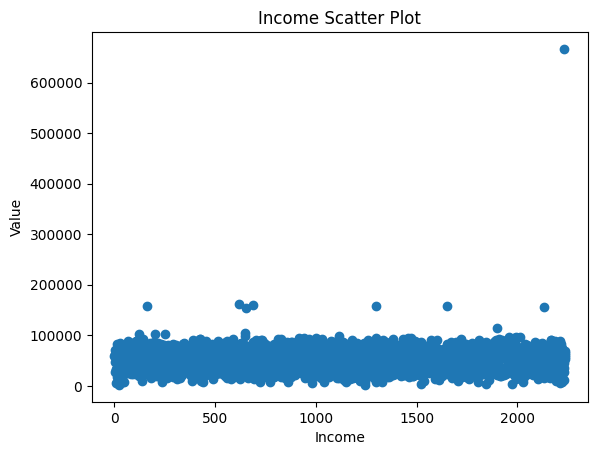

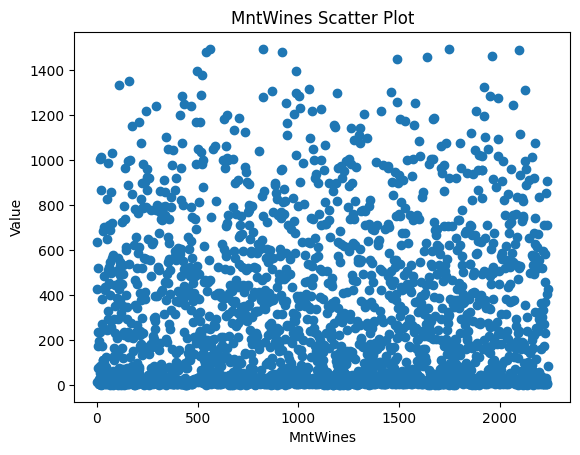

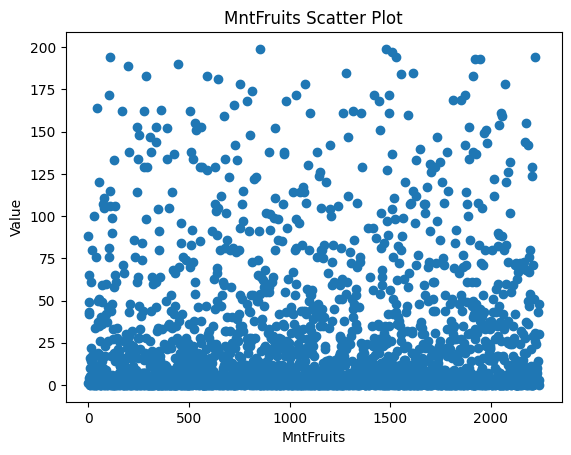

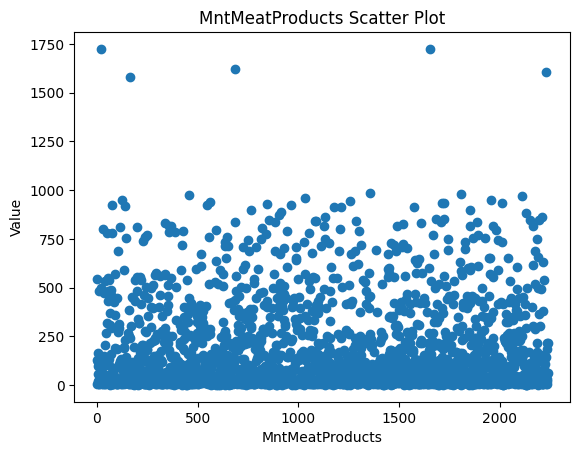

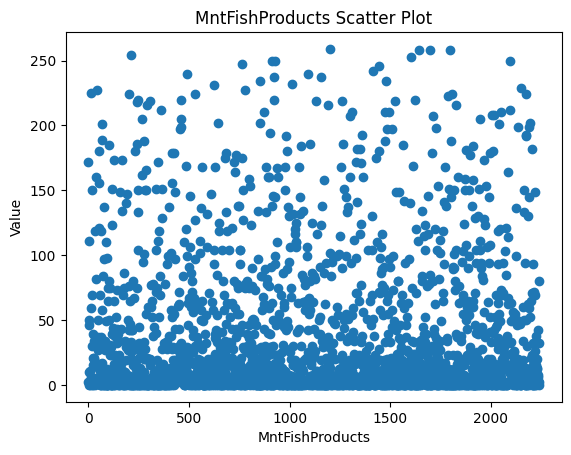

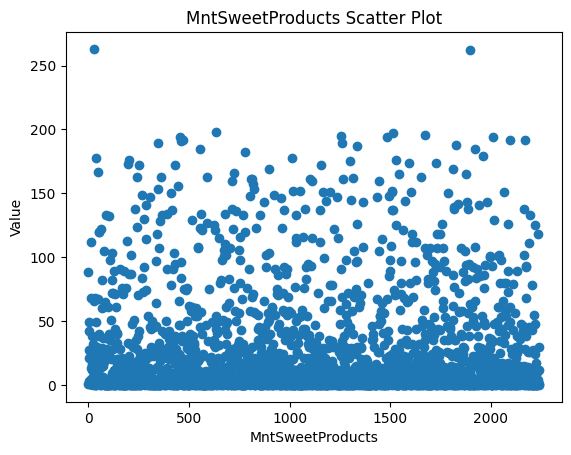

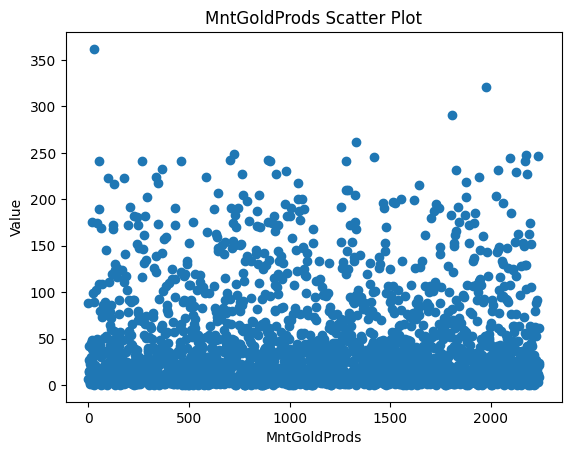

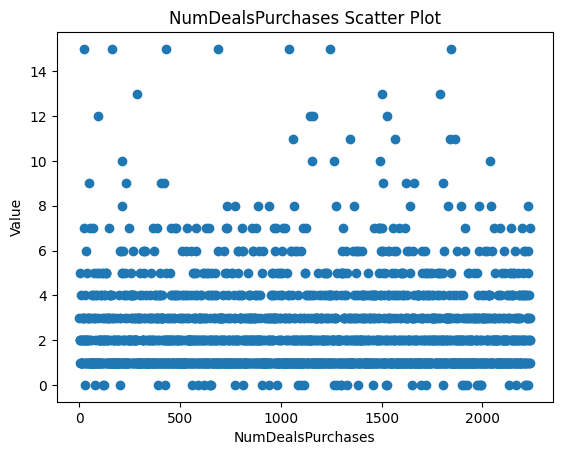

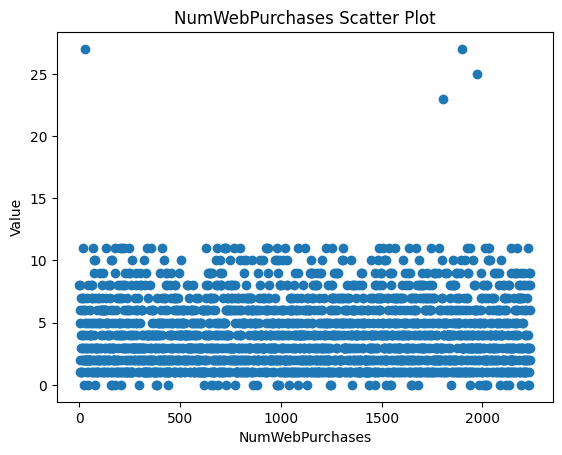

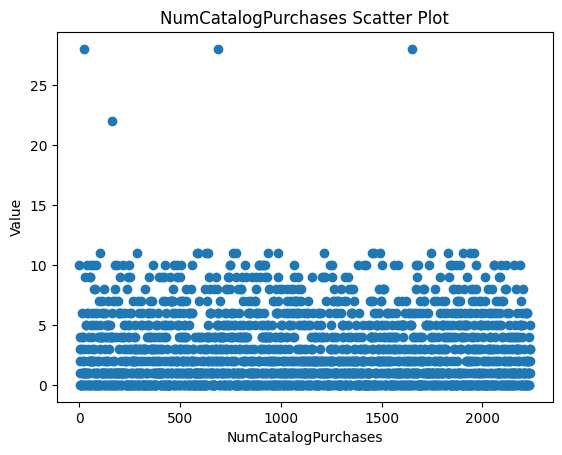

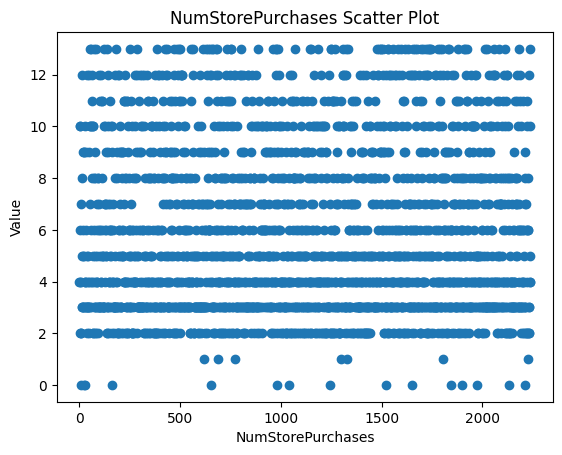

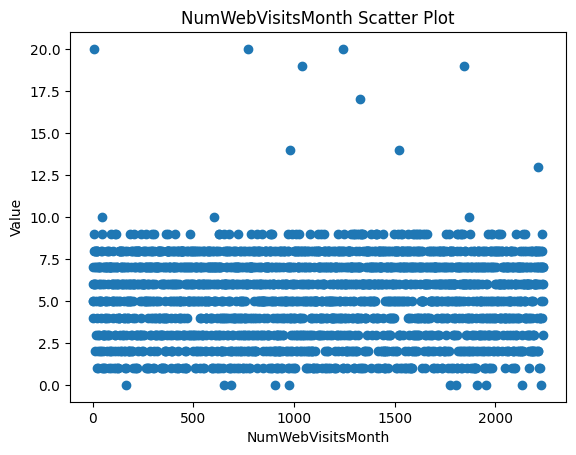

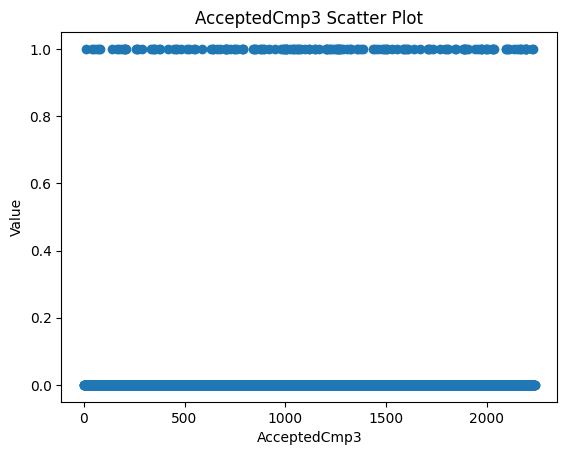

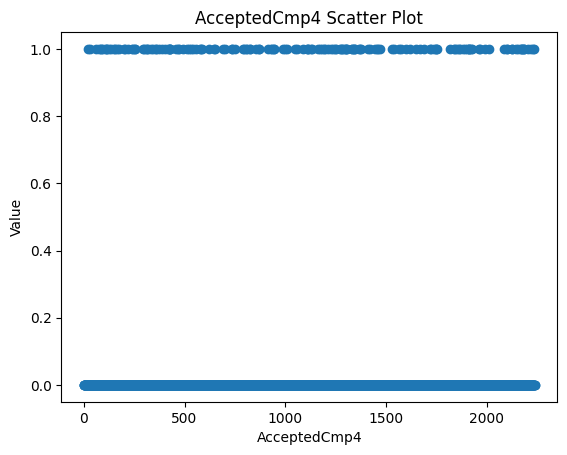

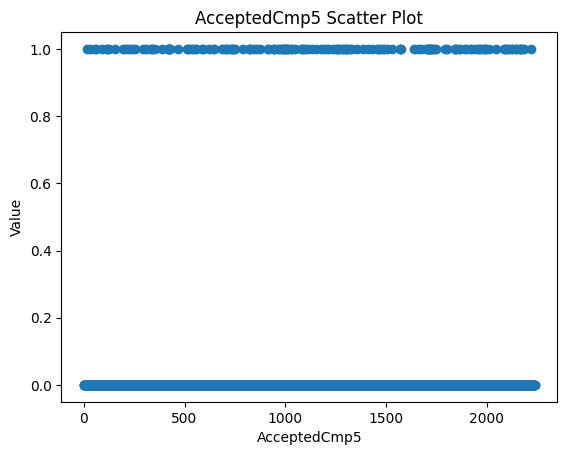

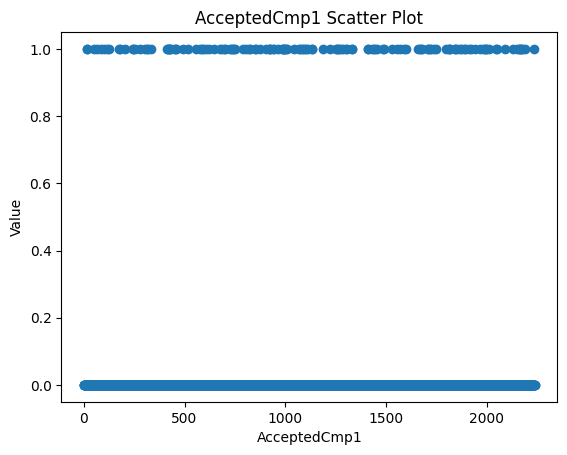

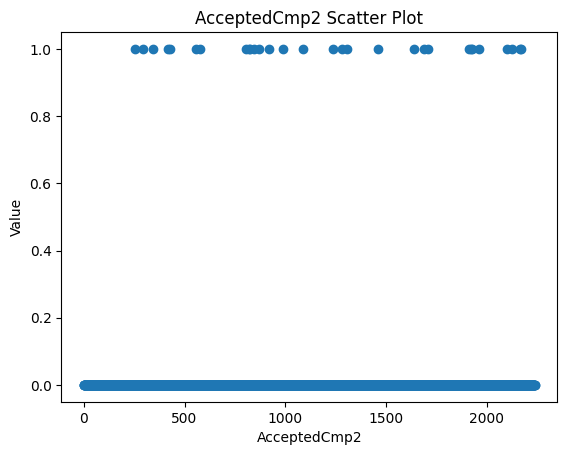

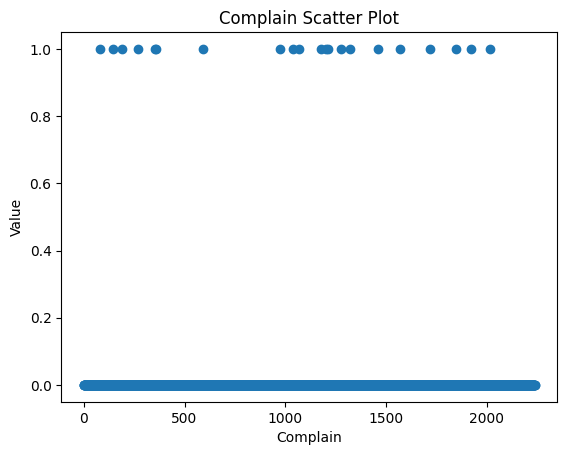

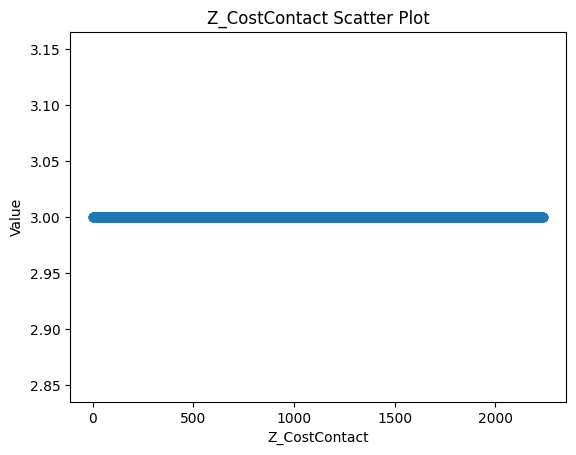

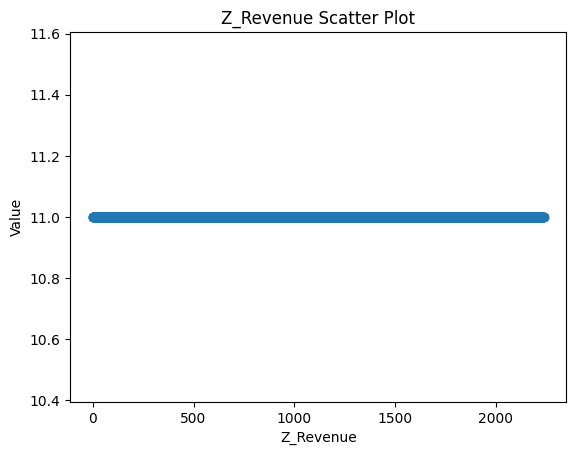

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features for plotting
variables = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']]

# Loop through each variable
for var in variables:
    # Check the data type
    if variables[var].dtype == 'float64' or variables[var].dtype == 'int64':
        # Plot a scatter plot if the variable is numerical
        plt.scatter(df.index, variables[var])
        plt.xlabel(var)
        plt.ylabel('Value')
        plt.title(f'{var} Scatter Plot')
        plt.show()
    elif variables[var].dtype == 'object':
        # Plot a bar plot if the variable is categorical
        sns.countplot(x=df[var], data=df)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'{var} Bar Plot')
        plt.show()

In [8]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [9]:
df = df[df['Income'] <= 600000]

K-Means Base Model

K-Means Cluster Counts:
0    1265
1     622
2     352
Name: count, dtype: int64
Silhouette Score (k=3): 0.4618


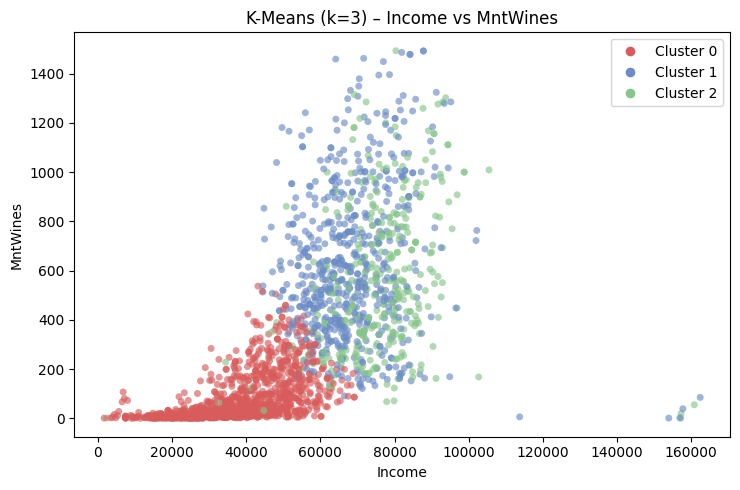


K-Means Cluster One-Liners:
Cluster 0: Higher MntFruits (+-0.9σ), MntMeatProducts (+-1.1σ); Lower MntWines (-1.4σ).
Cluster 1: Higher MntWines (+0.8σ), Income (+0.5σ); Lower MntFruits (-0.5σ).
Cluster 2: Higher MntFruits (+1.4σ), MntMeatProducts (+1.3σ); Lower MntWines (0.6σ).


In [10]:
# Simple K-Means Baseline (before hierarchical Base Model)
# Focus: quick segmentation on core spend & income features with a few concise visuals.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Core features (same set used later for hierarchical baseline to allow comparison)
km_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']
X_km = df[km_features].dropna()

if X_km.empty:
    raise ValueError("No rows available for K-Means after dropping NA values in core features.")

# Scale
scaler_km = StandardScaler()
X_km_scaled = scaler_km.fit_transform(X_km)

# Fit K-Means (k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
km_labels = kmeans.fit_predict(X_km_scaled)

# Persist labels without overwriting other clustering results
df.loc[X_km.index, 'kmeans_cluster'] = km_labels

# Basic counts & silhouette
sil = silhouette_score(X_km_scaled, km_labels) if len(set(km_labels)) > 1 else float('nan')
print("K-Means Cluster Counts:")
print(pd.Series(km_labels).value_counts().sort_index())
print(f"Silhouette Score (k={k}): {sil:.4f}" if not np.isnan(sil) else "Silhouette Score: NaN")

# Consistent muted palette (cycle if k > 3 later)
palette = {0: '#d95c5c', 1: '#6b8cc6', 2: '#87c68a'}
colors = [palette[int(c % len(palette))] for c in km_labels]

# 1. Representative scatter: Income vs MntWines
plt.figure(figsize=(7.5, 5))
plt.scatter(X_km['Income'], X_km['MntWines'], c=colors, s=25, alpha=0.65, edgecolor='none')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('K-Means (k=3) – Income vs MntWines')
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {c}',
                      markerfacecolor=palette[c], markersize=8) for c in sorted(set(km_labels))]
plt.legend(handles=handles)
plt.tight_layout()
plt.show()

# 2. Standardized centroid profile (relative across clusters)
centroids_scaled = kmeans.cluster_centers_  # already in scaled space
centroids_df = pd.DataFrame(centroids_scaled, columns=km_features)
# Z-standardize centroids across clusters feature-wise for interpretability
centroids_z = (centroids_df - centroids_df.mean(axis=0)) / centroids_df.std(axis=0, ddof=0)
centroids_z['cluster'] = centroids_z.index
profile_long = centroids_z.melt(id_vars='cluster', var_name='feature', value_name='z_score')

# 4. One-line summaries (top & bottom features per cluster)
print("\nK-Means Cluster One-Liners:")
for c in centroids_z['cluster']:
    row = centroids_z.loc[c, km_features]
    top2 = row.sort_values(ascending=False).head(2)
    low1 = row.sort_values(ascending=True).head(1)
    hi_txt = ', '.join([f"{f} (+{v:.1f}σ)" for f, v in top2.items()])
    lo_txt = ', '.join([f"{f} ({v:.1f}σ)" for f, v in low1.items()])
    print(f"Cluster {c}: Higher {hi_txt}; Lower {lo_txt}.")


Agglomerative Hierarchical Clustering Base Model

Cluster counts:
cluster
0.0     510
1.0    1210
2.0     519
Name: count, dtype: int64


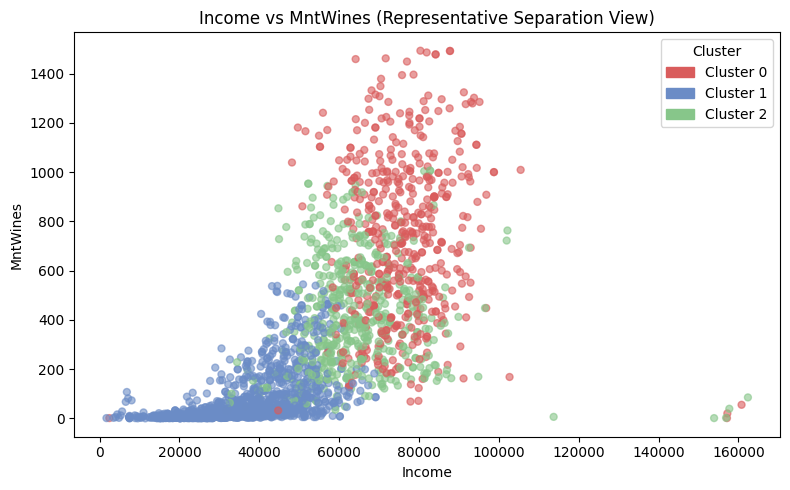

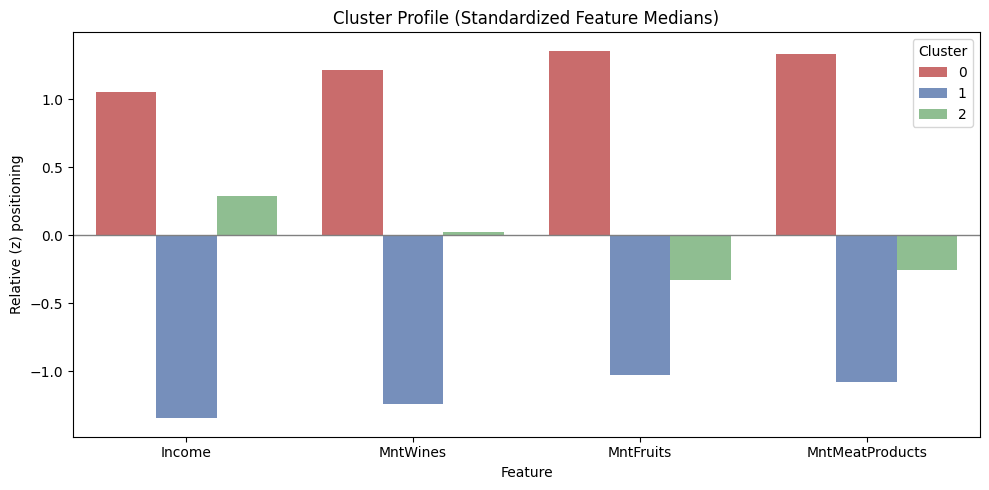


Cluster Profile One-Liners:
 - Cluster 0: Higher MntFruits (+1.4σ), MntMeatProducts (+1.3σ); Lower Income (1.1σ).
 - Cluster 1: Higher MntFruits (+-1.0σ), MntMeatProducts (+-1.1σ); Lower Income (-1.3σ).
 - Cluster 2: Higher Income (+0.3σ), MntWines (+0.0σ); Lower MntFruits (-0.3σ).

Raw Median Profiles:
          Income  MntWines  MntFruits  MntMeatProducts  n_customers
cluster                                                            
0        75495.5     728.5       68.0            414.5          510
1        36804.5      28.0        3.0             17.0         1210
2        63206.0     390.0       22.0            153.0          519


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np

# Base Model: cluster on four core features
features = ['Income','MntWines','MntFruits','MntMeatProducts']
X = df[features].dropna()

# Scale + cluster
X_scaled = StandardScaler().fit_transform(X)
labels = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_scaled)
df.loc[X.index, 'cluster'] = labels

print('Cluster counts:')
print(df.loc[X.index, 'cluster'].value_counts().sort_index())

# Muted palette
palette = {0: '#d95c5c', 1: '#6b8cc6', 2: '#87c68a'}
point_colors = [palette[int(c)] for c in labels]

# --- Single representative scatter plot (Income vs MntWines) --- #
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X['Income'], X['MntWines'], c=point_colors, s=25, alpha=0.6)
ax.set_xlabel('Income')
ax.set_ylabel('MntWines')
ax.set_title('Income vs MntWines (Representative Separation View)')
handles = [mpatches.Patch(color=palette[k], label=f'Cluster {k}') for k in sorted(palette)]
ax.legend(handles=handles, title='Cluster')
plt.tight_layout()
plt.show()

# ---------------- Business Readout Angle Additions ---------------- #
# 1. Cluster profile (median) + standardized (z across clusters per feature)
cluster_medians = X.assign(cluster=labels).groupby('cluster')[features].median()
# Standardize the medians feature-wise to highlight relative positioning
cluster_medians_z = (cluster_medians - cluster_medians.mean(axis=0)) / cluster_medians.std(axis=0, ddof=0)

# Long-form for plotting grouped bars: feature vs z-score per cluster
profile_long = cluster_medians_z.reset_index().melt(id_vars='cluster', var_name='feature', value_name='z_score')

plt.figure(figsize=(10, 5))
sns.barplot(data=profile_long, x='feature', y='z_score', hue='cluster', palette=[palette[c] for c in sorted(cluster_medians_z.index)])
plt.axhline(0, color='gray', linewidth=1)
plt.title('Cluster Profile (Standardized Feature Medians)')
plt.ylabel('Relative (z) positioning')
plt.xlabel('Feature')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# 2. One-liner summaries per cluster (based on highest/lowest z-scores)
summary_lines = []
for c in cluster_medians_z.index:
    z_row = cluster_medians_z.loc[c]
    top_pos = z_row.sort_values(ascending=False).head(2)
    top_neg = z_row.sort_values(ascending=True).head(1)
    positives = ', '.join([f"{feat} (+{val:.1f}σ)" for feat, val in top_pos.items()])
    negatives = ', '.join([f"{feat} ({val:.1f}σ)" for feat, val in top_neg.items()])
    line = f"Cluster {c}: Higher {positives}; Lower {negatives}." if negatives else f"Cluster {c}: Higher {positives}."
    summary_lines.append(line)

print('\nCluster Profile One-Liners:')
for l in summary_lines:
    print(' - ' + l)

# 3. Optional: tabular profile for quick export
profile_table = cluster_medians.copy()
profile_table['n_customers'] = pd.Series(labels).value_counts().sort_index()
print('\nRaw Median Profiles:')
print(profile_table)
# ------------------------------------------------------------------ #

Encode Categorical Features

Acknowledged. I’ll outline how encoding (cell 12), feature selection (cell 15), and your advanced model (cell 19) should relate, what’s currently missing or out of order conceptually, and recommended adjustments (no code changes yet).

## High‑Level Relationship
1. Data Cleaning & Preprocessing (imputation, outlier handling, type conversions).
2. Categorical Encoding (cell 12) — produces `df_encoded`.
3. (Optional) Scaling / Transformation — for distance-based models or algorithms sensitive to variance.
4. Feature Selection (cell 15) — should operate on the encoded numeric feature matrix (not the raw unencoded frame).
5. Modeling (advanced model in cell 19) — should use the feature-selected, encoded (and possibly scaled) data.

Right now, you have:
- Base work on `df` (raw with some cleaning).
- Encoding cell creates `df_encoded`.
- Feature selection cell drops columns (including `Income` earlier) then does hierarchical clustering + MI; it appears to rely on `df_encoded` but also at times you reintroduce `Income` later for clustering/plots.
- Advanced model (cell 19) directly clusters again, injects `Income`, and plots many relationships, but it doesn’t explicitly state whether it’s using (a) all encoded features, (b) top MI features, or (c) an unscaled subset. This weakens interpretability and repeatability.

## Should You Apply Encoding + Feature Selection Before the Advanced Model?
Yes—if the “advanced model” is intended to be a refined clustering based on:
- Categorical features represented numerically (LabelEncoder or better encodings).
- A reduced (or at least justified) feature subset selected via an information or clustering cohesion criterion (e.g., MI + silhouette).
- Consistent preprocessing (scaling if distances matter).

If the advanced model is only a richer visualization layer, you could keep it separate — but if you want “advanced” to mean “improved quality,” then it should:
1. Consume the encoded dataset.
2. (Optionally) Use the top K informative features (or at least compare full vs reduced).
3. Use scaling (StandardScaler or RobustScaler) across selected numeric features.
4. Document the feature list it used.
5. Provide one or two quality diagnostics (silhouette, Davies–Bouldin, Calinski–Harabasz, or cluster size distribution).

## Potential Gaps / Risks in Current Flow
- LabelEncoder may impose arbitrary ordinal relationships for Education / Marital_Status. If those are truly nominal, One-Hot Encoding (or target / weight encoding) might be better. For hierarchical clustering, one-hot is usually safer.
- Feature selection cell currently mixes clustering and selection logic; it clusters first, then uses MI vs cluster labels. This can reinforce initial clustering biases (circularity). A cleaner approach: either (a) use unsupervised feature selection (variance, correlation pruning, PCA) before clustering, or (b) accept the semi-supervised flavor but clearly document that cluster labels from an initial pass are used as a proxy target for MI ranking.
- Advanced model reclusters without clearly reusing the selected feature subset or pipeline; reproducibility suffers.
- You add `Income` back later: ensure consistency—if removed for selection metrics, note why you exclude/include it downstream.
- No persistent pipeline object; repeating steps increases chance of mismatch.

## Recommended Conceptual Reordering (No Code Yet)
1. Preprocess base `df` (already done: cleaning, date parsing, outlier filtering).
2. Split features:
   - Numeric continuous
   - Categorical nominal
3. Encode:
   - Use OneHotEncoder (or leave LabelEncoder if categories truly ordinal).
4. Scale numeric features (fit scaler).
5. Optional: reduce correlation (drop highly collinear numeric features).
6. Initial clustering (baseline) for diagnostic only.
7. Feature importance / selection:
   - Either unsupervised (PCA, variance threshold, correlation trimming).
   - Or current MI approach but label it “pseudo-supervised feature ranking.”
8. Advanced model:
   - Apply the selected feature set.
   - Refit clustering.
   - Evaluate quality metrics.
   - Store final labels and produce plots.

## What To Clarify Before Implementing
- Definition of “advanced”: Is it “better cluster separation,” “fewer features,” “faster,” or “interpretable segments”?
- Are categorical variables nominal? If yes, consider switching from LabelEncoder to One-Hot.
- Do you want reproducibility? If you move to algorithms with randomness (e.g., KMeans), set `random_state`.
- Are you planning to compare cluster solutions (e.g., different k values)? Adding an evaluation table helps.

## Minimal Adjustments (Conceptual)
- In advanced model cell: explicitly list the feature vector used (printed before clustering).
- Integrate selection: if you determined top N features in cell 15, pass only those into the advanced model.
- Add at least one quality metric printout (silhouette) for the advanced model’s chosen features.
- Optionally, store a dictionary: `final_cluster_context = {'features': used_features, 'scaler': scaler, 'model': model}` for reuse.

## If You Decide NOT To Use Feature Selection
That’s acceptable, but document why (e.g., domain-driven inclusion of all spend + engagement variables) and maybe show that the silhouette does not significantly improve with pruning.

## Quick “Advanced Model” Concept Blueprint
(Not to implement yet—just illustrating)
- Collect selected features: `selected_features = mi_df.feature.head(9).tolist()`
- Ensure `Income` is included (domain anchor)
- Build pipeline: `StandardScaler` -> (optional dimensionality reduction) -> `Agglomerative`
- Fit, report metrics, plot summarized cluster centers (median feature values) plus 2–3 key pairwise scatter plots.

## Summary Answer
Yes, you should integrate the encoded data and (optionally) the feature selection results into your advanced model to make it genuinely “advanced.” Right now they are conceptually disconnected; tightening that linkage improves explainability, reduces redundancy, and supports reproducibility.

Let me know:
- Do you want a streamlined pipeline version?
- Should I convert LabelEncoder usage to OneHot?
- Should feature selection become unsupervised instead?

Tell me which direction you prefer and I’ll draft the concrete code changes next.

In [12]:
# One-Hot Encode categorical features + scale numeric features (replaces prior LabelEncoder approach)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# Define categorical & numeric columns explicitly (fallbacks if names differ slightly)
possible_cats = ['Education', 'Marital_Status']
categorical_cols = [c for c in possible_cats if c in df.columns]

# Exclude ID-like and date columns from numeric feature list
exclude_cols = set(categorical_cols + ['ID', 'Dt_Customer'])
numeric_cols = [c for c in df.columns if c not in exclude_cols and pd.api.types.is_numeric_dtype(df[c])]

# Drop rows with any NaN in the numeric columns we intend to use (keeps indexing for alignment)
rows_before = df.shape[0]
clean_mask = df[numeric_cols].notna().all(axis=1)
if categorical_cols:
    clean_mask &= df[categorical_cols].notna().all(axis=1)
filtered_df = df.loc[clean_mask].copy()
rows_after = filtered_df.shape[0]
print(f"Rows retained after NA filtering: {rows_after}/{rows_before}")

# Build preprocessing transformer (OneHot for categoricals, scale numeric)
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:  # Older sklearn versions
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', ohe, categorical_cols)
    ],
    remainder='drop'
)

X_preprocessed = preprocessor.fit_transform(filtered_df)

# Retrieve feature names (numeric first, then expanded categorical)
feature_names = []
feature_names.extend(numeric_cols)
if categorical_cols:
    cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    feature_names.extend(cat_feature_names.tolist())

print(f"Total engineered features: {len(feature_names)}")
print("First 10 feature names:", feature_names[:10])
print("Preprocessed matrix shape:", X_preprocessed.shape)

# Persist for downstream steps
encoded_index = filtered_df.index  # store index alignment
X_feature_names = feature_names  # canonical list for subsequent selection steps

Rows retained after NA filtering: 2239/2239
Total engineered features: 35
First 10 feature names: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
Preprocessed matrix shape: (2239, 35)


In [13]:
# Preprocessing summary after One-Hot + scaling (pipeline stage)
if 'X_preprocessed' in globals():
    print(f"Numeric columns used: {len(numeric_cols)} -> {numeric_cols[:8]}{'...' if len(numeric_cols)>8 else ''}")
    print(f"Categorical columns (one-hot encoded): {categorical_cols}")
    print(f"Preprocessed feature matrix shape: {X_preprocessed.shape}")
else:
    print("Run the One-Hot encoding cell first to generate X_preprocessed.")

Numeric columns used: 25 -> ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts']...
Categorical columns (one-hot encoded): ['Education', 'Marital_Status']
Preprocessed feature matrix shape: (2239, 35)


In [14]:
# Unsupervised feature selection: variance filtering, correlation pruning, optional PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

if 'X_preprocessed' not in globals():
    raise RuntimeError("Expected X_preprocessed from prior cell. Run the encoding cell first.")

# 1. Variance Threshold (remove near-constant features)
var_thresh = 1e-4  # very low; adjust if many one-hot columns are constant
vt = VarianceThreshold(threshold=var_thresh)
X_var = vt.fit_transform(X_preprocessed)
kept_mask_var = vt.get_support()
var_feature_names = [n for n, keep in zip(X_feature_names, kept_mask_var) if keep]
print(f"Variance step: {len(var_feature_names)}/{len(X_feature_names)} features retained")

# 2. Correlation pruning (on numeric representation; treat all as numeric now)
# Compute correlation on the retained features
X_var_df = pd.DataFrame(X_var, columns=var_feature_names, index=encoded_index)
cor_matrix = X_var_df.corr(numeric_only=True).abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
cor_threshold = 0.90  # drop one of any pair with |corr| >= this
high_correlated = [column for column in upper.columns if any(upper[column] >= cor_threshold)]
pruned_features = [f for f in var_feature_names if f not in high_correlated]
X_pruned = X_var_df[pruned_features].values
print(f"Correlation step: {len(pruned_features)}/{len(var_feature_names)} features retained (removed {len(high_correlated)} high-corr features)")

# 3. Optional PCA for dimensionality reduction while preserving variance
apply_pca = True
pca_variance_target = 0.90  # keep components explaining 90% variance
if apply_pca and X_pruned.shape[1] > 2:
    pca = PCA(n_components=pca_variance_target, svd_solver='full', random_state=42)
    X_reduced = pca.fit_transform(X_pruned)
    print(f"PCA reduced dimensionality from {X_pruned.shape[1]} to {X_reduced.shape[1]} components (90% variance)")
    print("Explained variance ratios (first 10):", np.round(pca.explained_variance_ratio_[:10], 4))
    feature_space_description = 'pca_components'
else:
    pca = None
    X_reduced = X_pruned
    feature_space_description = 'pruned_features'
    print("PCA skipped (insufficient features or disabled)")

# Summary
print("Final feature matrix shape:", X_reduced.shape)

# Persist artifacts for clustering stage
X_final = X_reduced  # numeric matrix for clustering
selected_original_features = pruned_features  # names prior to PCA
pca_model = pca

# Quick sanity check: variance of each final dimension
print("Per-dimension variance (first 10):", np.var(X_final, axis=0)[:10])

Variance step: 35/35 features retained
Correlation step: 35/35 features retained (removed 0 high-corr features)
PCA reduced dimensionality from 35 to 20 components (90% variance)
Explained variance ratios (first 10): [0.2876 0.0825 0.0729 0.0537 0.0422 0.0388 0.038  0.0366 0.0319 0.0292]
Final feature matrix shape: (2239, 20)
Per-dimension variance (first 10): [7.58893773 2.17736296 1.92416034 1.4169377  1.11288668 1.02411559
 1.003493   0.96693327 0.84220187 0.77091747]


Feature Selection with Silhouette Score

Agglomerative Hierarchical Clustering Improved Model

Advanced Model Metrics (n_clusters=3):
  Silhouette Score: 0.1938
  Davies-Bouldin Score: 2.1620
  Calinski-Harabasz Score: 454.89

Cluster Size Distribution (ordered labels):
advanced_cluster_ordered
0    1270
1     432
2     537
Name: count, dtype: int64
Feature space description: pca
Original (pre-PCA) features used count: 35

  Silhouette Score: 0.1938
  Davies-Bouldin Score: 2.1620
  Calinski-Harabasz Score: 454.89

Cluster Size Distribution (ordered labels):
advanced_cluster_ordered
0    1270
1     432
2     537
Name: count, dtype: int64
Feature space description: pca
Original (pre-PCA) features used count: 35


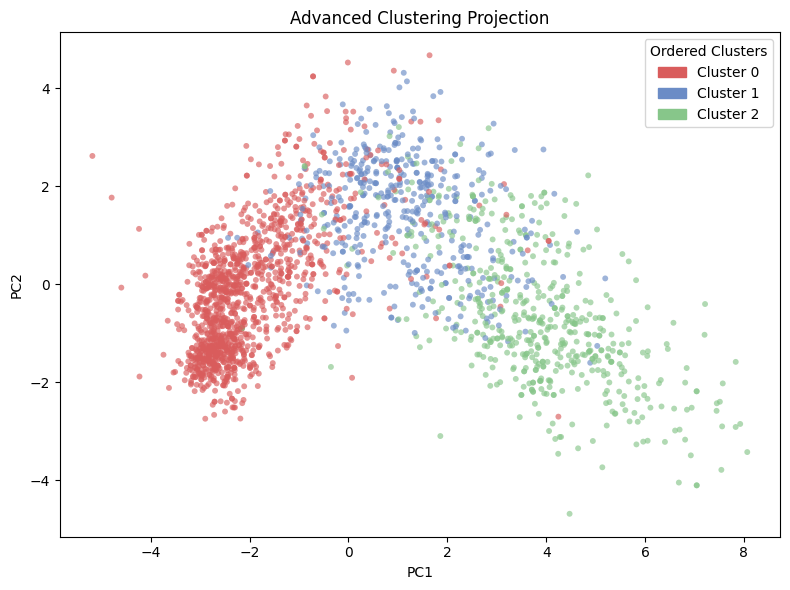

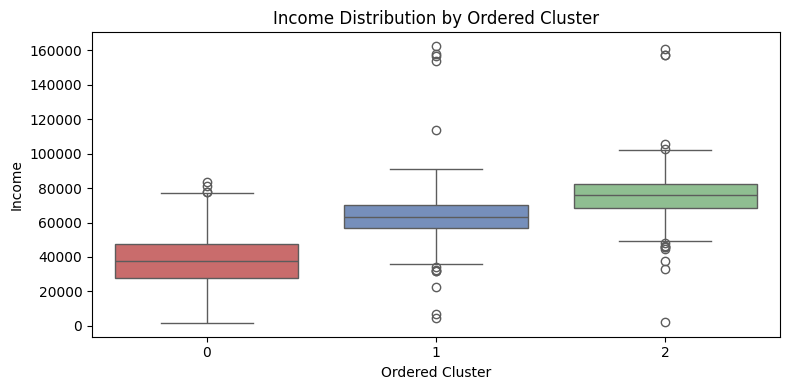

In [15]:
# Advanced Model: Agglomerative clustering on unsupervised-selected feature space (better separation focus)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

if 'X_final' not in globals():
    raise RuntimeError("X_final not found. Run encoding + feature selection cells first.")

n_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = cluster_model.fit_predict(X_final)

# Create/align a results frame with original indexes
results_index = encoded_index  # index from filtered_df used in encoding
cluster_series = pd.Series(cluster_labels, index=results_index, name='cluster')

# Attach to main df (will introduce NaN for rows dropped earlier)
df['advanced_cluster'] = np.nan
df.loc[cluster_series.index, 'advanced_cluster'] = cluster_series

# For ordering clusters by median Income (only consider rows present in clustering subset with Income available)
if 'Income' in df.columns:
    subset = df.loc[cluster_series.index].dropna(subset=['Income']).copy()
    income_order = subset.groupby('advanced_cluster')['Income'].median().sort_values().index.tolist()
    mapping = {old: new for new, old in enumerate(income_order)}
    df['advanced_cluster_ordered'] = df['advanced_cluster'].map(mapping)
    ordered_labels = df.loc[cluster_series.index, 'advanced_cluster_ordered'].astype(int)
else:
    ordered_labels = cluster_labels

# Metrics (only compute on rows used in clustering and with final labels)
metrics_X = X_final
metrics_labels = ordered_labels
unique_label_count = len(np.unique(metrics_labels))
if unique_label_count > 1 and metrics_X.shape[0] > unique_label_count:
    sil = silhouette_score(metrics_X, metrics_labels)
    db = davies_bouldin_score(metrics_X, metrics_labels)
    ch = calinski_harabasz_score(metrics_X, metrics_labels)
else:
    sil = np.nan; db = np.nan; ch = np.nan

print(f"Advanced Model Metrics (n_clusters={n_clusters}):")
print(f"  Silhouette Score: {sil:.4f}" if not np.isnan(sil) else "  Silhouette Score: NaN")
print(f"  Davies-Bouldin Score: {db:.4f}" if not np.isnan(db) else "  Davies-Bouldin Score: NaN (needs >=2 clusters)")
print(f"  Calinski-Harabasz Score: {ch:.2f}" if not np.isnan(ch) else "  Calinski-Harabasz Score: NaN")
print()
print("Cluster Size Distribution (ordered labels):")
print(pd.Series(metrics_labels).value_counts().sort_index())

# Store artifacts for later reference
advanced_artifacts = {
    'model': cluster_model,
    'labels': metrics_labels,
    'n_clusters': n_clusters,
    'silhouette': sil,
    'davies_bouldin': db,
    'calinski_harabasz': ch,
    'feature_space': 'pca' if pca_model is not None else 'pruned',
    'original_features_used': selected_original_features,
    'pca_components': pca_model.n_components_ if pca_model is not None else None
}

print("Feature space description:", advanced_artifacts['feature_space'])
print("Original (pre-PCA) features used count:", len(selected_original_features))

# Visualization strategy:
# If PCA was applied with >=2 components, plot first two PCs; otherwise, pick two highest variance dimensions
if X_final.shape[1] >= 2:
    x_coord = X_final[:, 0]
    y_coord = X_final[:, 1]
    xlabel = 'PC1' if pca_model is not None else 'Dim1'
    ylabel = 'PC2' if pca_model is not None else 'Dim2'
else:
    # Only one dimension; duplicate for plotting aesthetics
    x_coord = X_final[:, 0]
    y_coord = np.zeros_like(x_coord)
    xlabel = 'Dim1'
    ylabel = 'Zero'

palette = {0: '#d95c5c', 1: '#6b8cc6', 2: '#87c68a'}
colors = [palette[int(l % len(palette))] for l in metrics_labels]

plt.figure(figsize=(8, 6))
plt.scatter(x_coord, y_coord, c=colors, s=18, alpha=0.65, edgecolor='none')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Advanced Clustering Projection')
handles = [mpatches.Patch(color=palette[k], label=f'Cluster {k}') for k in sorted(np.unique(metrics_labels))]
plt.legend(handles=handles, title='Ordered Clusters')
plt.tight_layout()
plt.show()

# If Income present, plot Income distribution per ordered cluster for interpretability
if 'Income' in df.columns and 'advanced_cluster_ordered' in df.columns and not df['advanced_cluster_ordered'].isna().all():
    # Prepare tidy subset for seaborn
    plot_subset = df.loc[cluster_series.index, ['advanced_cluster_ordered', 'Income']].dropna().copy()
    plot_subset['advanced_cluster_ordered'] = plot_subset['advanced_cluster_ordered'].astype(int)
    # Use hue identical to x to keep colors without triggering the future warning
    plt.figure(figsize=(8, 4))
    sns.boxplot(
        data=plot_subset,
        x='advanced_cluster_ordered',
        y='Income',
        hue='advanced_cluster_ordered',
        dodge=False,
        palette=palette,
        legend=False
    )
    # Remove automatically added legend (older seaborn versions) if present
    if plt.gca().legend_ is not None:
        plt.gca().legend_.remove()
    plt.xlabel('Ordered Cluster')
    plt.ylabel('Income')
    plt.title('Income Distribution by Ordered Cluster')
    plt.tight_layout()
    plt.show()

=== Top Configurations (by silhouette) ===
representation  k  components  silhouette  davies_bouldin  calinski_harabasz
         pca_2  3         2.0    0.518457        0.690292        3909.265588
         pca_2  2         2.0    0.503068        0.709813        2502.990258
         pca_3  2         3.0    0.474860        0.882066        2213.865553
         pca_2  4         2.0    0.468721        0.825545        3438.484364
         pca_3  4         3.0    0.421132        0.922804        1718.050388
         pca_5  2         5.0    0.405378        1.067748        1282.179686
         pca_3  3         3.0    0.403235        1.069963        1823.442112
         pca_2  5         2.0    0.402543        0.859282        3309.177522
         pca_2  6         2.0    0.351685        0.883159        3329.314204
        pca_10  2        10.0    0.346430        1.389213         920.429101

Chosen configuration:
representation             pca_2
k                              3
components           

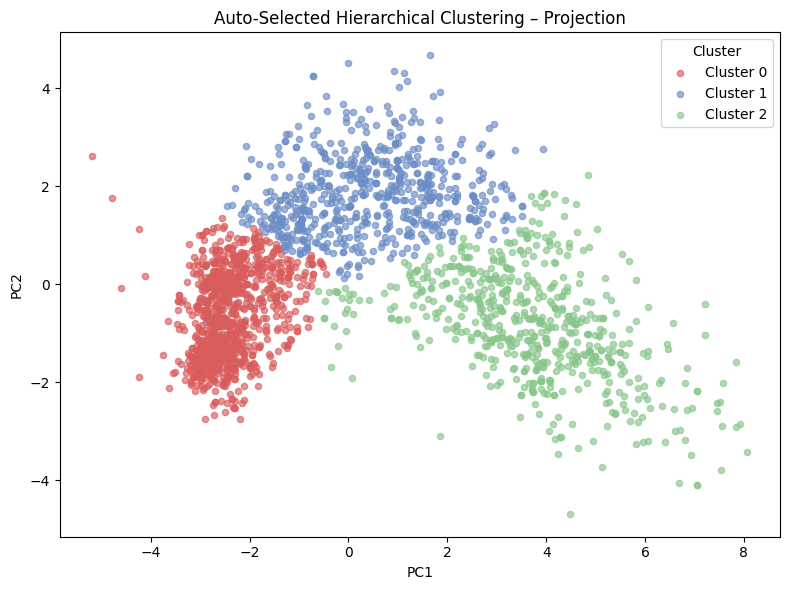

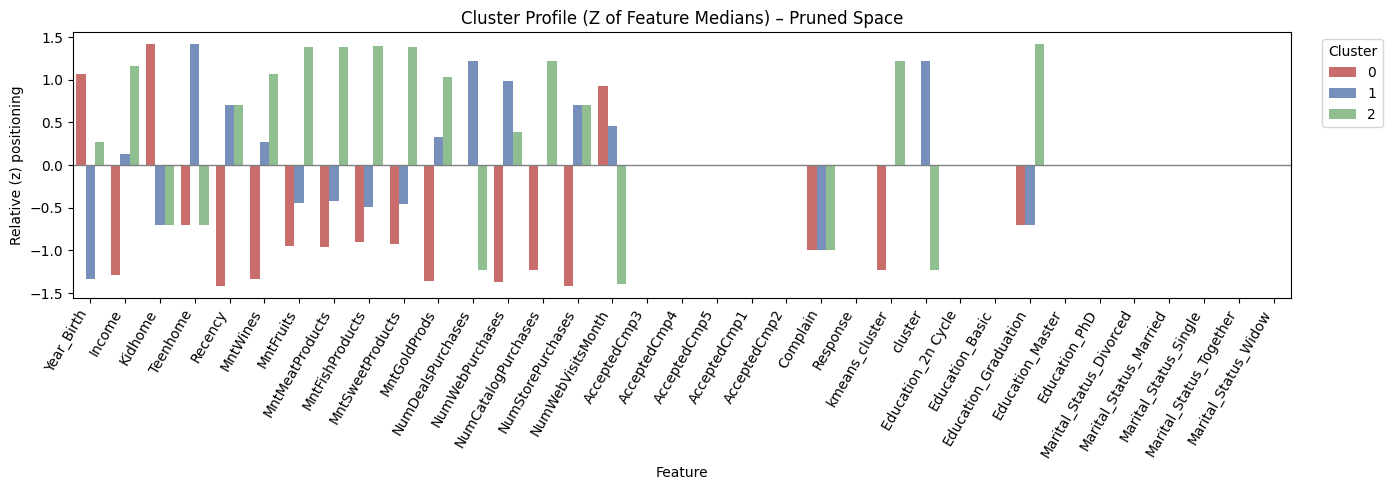

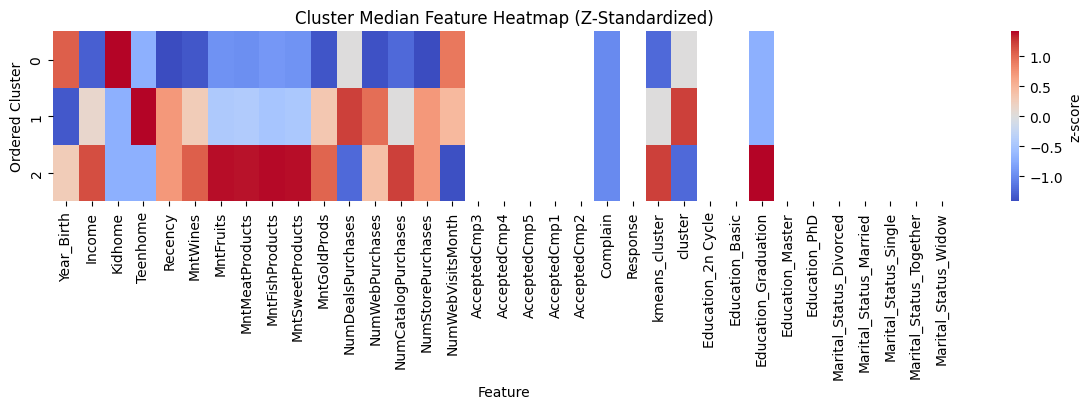

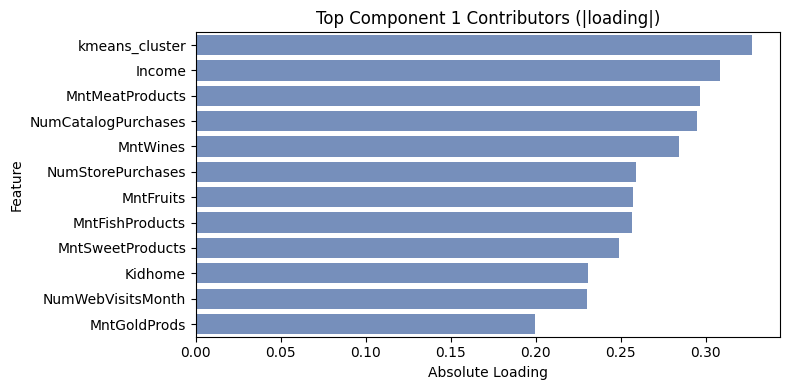

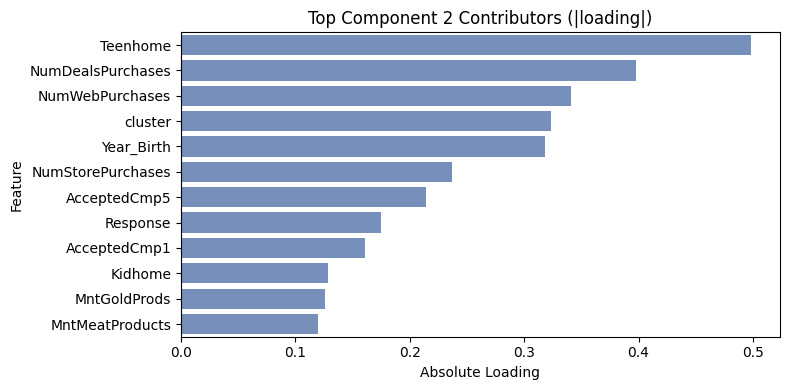

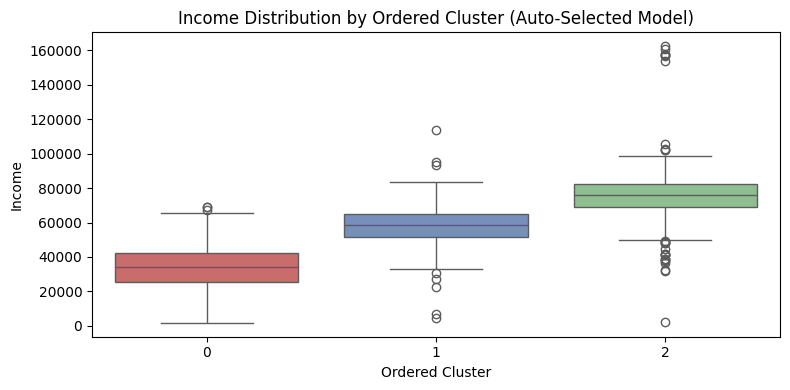


Cluster One-Liners (top + high, top - low):
Cluster 0: Higher Kidhome (+1.4σ), Year_Birth (+1.1σ); Lower NumStorePurchases (-1.4σ).
Cluster 1: Higher Teenhome (+1.4σ), cluster (+1.2σ); Lower Year_Birth (-1.3σ).
Cluster 2: Higher Education_Graduation (+1.4σ), MntFishProducts (+1.4σ); Lower NumWebVisitsMonth (-1.4σ).

Artifacts stored in advanced_auto_artifacts. View with advanced_auto_artifacts['evaluation_table'].head().


In [16]:
# Cell 16: Enhanced Auto-Selected Hierarchical Clustering Model
# Searches across cluster counts (k) and representations (raw pruned vs PCA dims),
# ranks by composite metrics, refits best model, and produces rich interpretability outputs.

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# -------------------------- Preconditions -------------------------- #
needed = ['X_preprocessed','encoded_index','X_feature_names','selected_original_features']
for v in needed:
    if v not in globals():
        raise RuntimeError(f"Missing prerequisite variable '{v}'. Run prior preprocessing cells.")

# Reconstruct X_pruned if not present (feature set prior to any PCA)
if 'X_pruned' not in globals():
    pre_df_full = pd.DataFrame(X_preprocessed, index=encoded_index, columns=X_feature_names)
    missing_feats = [f for f in selected_original_features if f not in pre_df_full.columns]
    if missing_feats:
        raise RuntimeError(f"Cannot rebuild X_pruned; missing: {missing_feats}")
    X_pruned = pre_df_full[selected_original_features].values

# -------------------------- Configuration -------------------------- #
linkage_method = 'ward'
random_state = 42
candidate_k = [2,3,4,5,6]
pca_components_grid = [None, 2, 3, 5, 10]   # None => raw pruned feature space

# Filter infeasible k values
n_samples = X_pruned.shape[0]
candidate_k = [k for k in candidate_k if k < n_samples]
if not candidate_k:
    raise RuntimeError("No feasible k values (< n_samples).")

# -------------------------- Helpers -------------------------- #
def _cluster_metrics(X, labels):
    u = np.unique(labels)
    if len(u) < 2 or X.shape[0] <= len(u):
        return np.nan, np.nan, np.nan
    return (
        silhouette_score(X, labels),
        davies_bouldin_score(X, labels),
        calinski_harabasz_score(X, labels)
    )

# -------------------------- Evaluation Loop -------------------------- #
records = []
max_dims = X_pruned.shape[1]
for comps in pca_components_grid:
    if comps is None:
        X_space = X_pruned
        rep_tag = 'raw_pruned'
    else:
        if comps > max_dims or comps < 2:
            continue
        pca_tmp = PCA(n_components=comps, svd_solver='full', random_state=random_state)
        X_space = pca_tmp.fit_transform(X_pruned)
        rep_tag = f'pca_{comps}'
    for k in candidate_k:
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        labels = model.fit_predict(X_space)
        sil, db, ch = _cluster_metrics(X_space, labels)
        records.append({
            'representation': rep_tag,
            'k': k,
            'components': (None if rep_tag == 'raw_pruned' else comps),
            'silhouette': sil,
            'davies_bouldin': db,
            'calinski_harabasz': ch
        })

eval_df = pd.DataFrame(records)
if eval_df.empty:
    raise RuntimeError("No evaluation results produced.")

# Ranking: high silhouette, low DB, high CH
eval_df['r_sil'] = (-eval_df['silhouette']).rank(method='min')
eval_df['r_db']  = (eval_df['davies_bouldin']).rank(method='min')
eval_df['r_ch']  = (-eval_df['calinski_harabasz']).rank(method='min')
eval_df['composite_rank'] = eval_df[['r_sil','r_db','r_ch']].sum(axis=1)

best = eval_df.sort_values(['composite_rank','r_sil','r_db','r_ch']).iloc[0]
print("=== Top Configurations (by silhouette) ===")
print(
    eval_df.sort_values('silhouette', ascending=False)
           .head(10)[['representation','k','components','silhouette','davies_bouldin','calinski_harabasz']]
           .to_string(index=False)
)
print("\nChosen configuration:")
print(best[['representation','k','components','silhouette','davies_bouldin','calinski_harabasz']])

# -------------------------- Refit Final Model -------------------------- #
if best['representation'] == 'raw_pruned':
    X_used = X_pruned
    final_pca_model = None
    rep_desc = f"raw_pruned ({X_used.shape[1]} feats)"
else:
    n_comp = int(best['components'])
    final_pca_model = PCA(n_components=n_comp, svd_solver='full', random_state=random_state)
    X_used = final_pca_model.fit_transform(X_pruned)
    rep_desc = f"pca_{n_comp} (from {X_pruned.shape[1]} feats)"

final_k = int(best['k'])
final_model = AgglomerativeClustering(n_clusters=final_k, linkage=linkage_method)
final_labels = final_model.fit_predict(X_used)

# Store labels (distinct from earlier advanced model)
series_labels = pd.Series(final_labels, index=encoded_index, name='adv2_cluster')
df['adv2_cluster'] = np.nan
df.loc[series_labels.index, 'adv2_cluster'] = series_labels

# Order clusters by median Income if available
if 'Income' in df.columns:
    inc_subset = df.loc[series_labels.index].dropna(subset=['Income']).copy()
    inc_order = inc_subset.groupby('adv2_cluster')['Income'].median().sort_values().index.tolist()
    order_map = {old: new for new, old in enumerate(inc_order)}
    df['adv2_cluster_ordered'] = df['adv2_cluster'].map(order_map)
    ordered_labels = df.loc[series_labels.index, 'adv2_cluster_ordered'].astype(int)
else:
    ordered_labels = final_labels

sil_f, db_f, ch_f = _cluster_metrics(X_used, ordered_labels)
print("\n=== Final Auto-Selected Model Metrics ===")
print(f"Representation: {rep_desc}")
print(f"k: {final_k}")
print(f"Silhouette: {sil_f:.4f}" if not np.isnan(sil_f) else "Silhouette: NaN")
print(f"Davies-Bouldin: {db_f:.4f}" if not np.isnan(db_f) else "Davies-Bouldin: NaN")
print(f"Calinski-Harabasz: {ch_f:.2f}" if not np.isnan(ch_f) else "Calinski-Harabasz: NaN")
print("Cluster sizes (ordered):")
print(pd.Series(ordered_labels).value_counts().sort_index())

# -------------------------- Visualization: Projection -------------------------- #
palette = {0:'#d95c5c',1:'#6b8cc6',2:'#87c68a',3:'#c29dda',4:'#8fb8de',5:'#b4d3a7'}
unique_c = sorted(np.unique(ordered_labels))
color_map = {c: palette.get(c, plt.cm.tab10(c % 10)) for c in unique_c}

if final_pca_model is not None and final_pca_model.n_components_ >= 2:
    proj = X_used[:, :2]
    xlabel, ylabel = 'PC1', 'PC2'
else:
    # Derive a 2D PCA only for visualization (does not affect clustering)
    pca_vis = PCA(n_components=2, svd_solver='full', random_state=random_state)
    proj = pca_vis.fit_transform(X_pruned)
    xlabel, ylabel = 'VisPC1', 'VisPC2'

plt.figure(figsize=(8,6))
for c in unique_c:
    mask = (ordered_labels == c)
    plt.scatter(proj[mask,0], proj[mask,1], s=20, alpha=0.65, c=color_map[c], label=f"Cluster {c}")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Auto-Selected Hierarchical Clustering – Projection')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -------------------------- Cluster Profiling -------------------------- #
pruned_df = pd.DataFrame(X_pruned, index=encoded_index, columns=selected_original_features)
pruned_df['cluster_ord'] = ordered_labels.values
cluster_meds = pruned_df.groupby('cluster_ord')[selected_original_features].median()
cluster_meds_z = (cluster_meds - cluster_meds.mean(axis=0)) / cluster_meds.std(axis=0, ddof=0)
profile_long = cluster_meds_z.reset_index().melt(id_vars='cluster_ord', var_name='feature', value_name='z_score')

plt.figure(figsize=(min(14, 0.55*len(selected_original_features)+4), 5))
sns.barplot(data=profile_long, x='feature', y='z_score', hue='cluster_ord', palette=[color_map[c] for c in unique_c])
plt.axhline(0, color='gray', linewidth=1)
plt.title('Cluster Profile (Z of Feature Medians) – Pruned Space')
plt.ylabel('Relative (z) positioning')
plt.xlabel('Feature')
plt.legend(title='Cluster', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(min(12, 0.45*cluster_meds_z.shape[1]+3), 3 + 0.4*cluster_meds_z.shape[0]))
sns.heatmap(cluster_meds_z, cmap='coolwarm', center=0, annot=False, cbar_kws={'label':'z-score'})
plt.title('Cluster Median Feature Heatmap (Z-Standardized)')
plt.ylabel('Ordered Cluster')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# PCA component loading bars if PCA used
if best['representation'] != 'raw_pruned':
    loadings_df = pd.DataFrame(final_pca_model.components_, columns=selected_original_features)
    for i in range(min(2, loadings_df.shape[0])):
        comp_top = loadings_df.iloc[i].abs().sort_values(ascending=False).head(12)
        plt.figure(figsize=(8,4))
        sns.barplot(x=comp_top.values, y=comp_top.index, color='#6b8cc6')
        plt.title(f'Top Component {i+1} Contributors (|loading|)')
        plt.xlabel('Absolute Loading')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

# Income distribution (ordered)
if 'Income' in df.columns:
    if 'adv2_cluster_ordered' not in df.columns:
        df['adv2_cluster_ordered'] = df['adv2_cluster']  # fallback
    inc_plot = df.loc[series_labels.index, ['adv2_cluster_ordered','Income']].dropna().copy()
    if not inc_plot.empty:
        inc_plot['adv2_cluster_ordered'] = inc_plot['adv2_cluster_ordered'].astype(int)
        plt.figure(figsize=(8,4))
        sns.boxplot(data=inc_plot, x='adv2_cluster_ordered', y='Income', hue='adv2_cluster_ordered', dodge=False,
                    palette=color_map, legend=False)
        if plt.gca().legend_ is not None:
            plt.gca().legend_.remove()
        plt.xlabel('Ordered Cluster')
        plt.ylabel('Income')
        plt.title('Income Distribution by Ordered Cluster (Auto-Selected Model)')
        plt.tight_layout()
        plt.show()

# One-line summaries
print('\nCluster One-Liners (top + high, top - low):')
for c in unique_c:
    row = cluster_meds_z.loc[c]
    top_pos = row.sort_values(ascending=False).head(2)
    top_neg = row.sort_values(ascending=True).head(1)
    pos_txt = ', '.join([f"{f} (+{v:.1f}σ)" for f,v in top_pos.items()])
    neg_txt = ', '.join([f"{f} ({v:.1f}σ)" for f,v in top_neg.items()])
    print(f"Cluster {c}: Higher {pos_txt}; Lower {neg_txt}.")

# -------------------------- Artifact Packaging -------------------------- #
advanced_auto_artifacts = {
    'model': final_model,
    'labels': ordered_labels,
    'k': final_k,
    'representation': best['representation'],
    'components': (int(best['components']) if best['components'] is not None and not pd.isna(best['components']) else None),
    'silhouette': sil_f,
    'davies_bouldin': db_f,
    'calinski_harabasz': ch_f,
    'evaluation_table': eval_df[['representation','k','components','silhouette','davies_bouldin','calinski_harabasz','composite_rank']].copy(),
    'pruned_feature_count': X_pruned.shape[1],
    'selected_original_features': selected_original_features,
    'pca_model': (final_pca_model if best['representation'] != 'raw_pruned' else None),
    'projection_labels': {'x': xlabel, 'y': ylabel}
}
print("\nArtifacts stored in advanced_auto_artifacts. View with advanced_auto_artifacts['evaluation_table'].head().")